<a href="https://colab.research.google.com/github/cypherop/Crop-Disease-Detection/blob/master/CropDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
drive.mount('/gdrive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!unzip "/gdrive/My Drive/CropDataset.zip"

In [0]:
!ls

Dataset  sample_data


In [0]:
import os
import keras
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,MaxPooling2D,Dropout,Lambda,Concatenate
from keras.models import Model,Sequential
from keras.optimizers import Adam

In [0]:
train_minibatch_size = 128
val_minibatch_size = 64
Image_shape = (256,256,3)

In [0]:
classes=[]
for clas in os.listdir('./Dataset/train/'):
	classes.append(clas)

In [0]:
train_batch=ImageDataGenerator(rescale=1./225).flow_from_directory(
            directory='./Dataset/train',
            target_size=(256,256),
            color_mode='rgb',
            classes=classes,
            batch_size=train_minibatch_size,
            class_mode='categorical',
            shuffle=True)

Found 70295 images belonging to 38 classes.


In [0]:
val_batch=ImageDataGenerator(rescale=1./225).flow_from_directory(
            directory='./Dataset/test',
            target_size=(256,256),
            color_mode='rgb',
            classes=classes,
            batch_size=val_minibatch_size,
            class_mode='categorical',
            shuffle=True)

Found 17572 images belonging to 38 classes.


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',padding='same',input_shape=Image_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(38, activation='softmax'))

In [0]:

model.compile(Adam(lr=.0001),'categorical_crossentropy',metrics=['accuracy'])


In [0]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)       

In [0]:
history = model.fit_generator(train_batch, steps_per_epoch=550, validation_data=val_batch, validation_steps=275, epochs=13, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/13
550/550 [==============================] - 280s 510ms/step - loss: 1.3143 - acc: 0.6279 - val_loss: 0.7921 - val_acc: 0.7482
Epoch 2/13
550/550 [==============================] - 263s 477ms/step - loss: 0.3847 - acc: 0.8807 - val_loss: 0.3881 - val_acc: 0.8731
Epoch 3/13
550/550 [==============================] - 262s 477ms/step - loss: 0.2119 - acc: 0.9327 - val_loss: 0.5298 - val_acc: 0.8415
Epoch 4/13
550/550 [==============================] - 262s 477ms/step - loss: 0.1416 - acc: 0.9545 - val_loss: 0.3129 - val_acc: 0.8986
Epoch 5/13
550/550 [==============================] - 262s 476ms/step - loss: 0.1005 - acc: 0.9678 - val_loss: 0.2484 - val_acc: 0.9200
Epoch 6/13
550/550 [==============================] - 262s 476ms/step - loss: 0.0773 - acc: 0.9750 - val_loss: 0.1754 - val_acc: 0.9453
Epoch 7/13
550/550 [==============================] - 262s 476ms/step - loss: 0.0573 - a

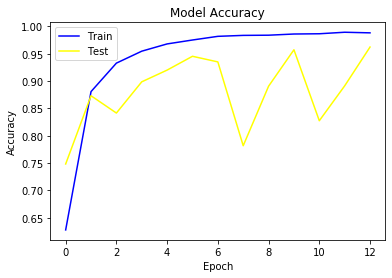

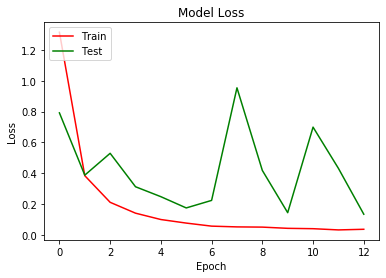

In [0]:

plt.plot(history.history['acc'], color='blue')
plt.plot(history.history['val_acc'], color='yellow')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
!unzip "/gdrive/My Drive/CropTestImages.zip"

In [0]:
model_json = model.to_json()
with open("CropModel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("CropModel.h5")

In [0]:
!ls

CropModel.h5  CropModel.json  CropTestImages  Dataset  sample_data


Prediction:


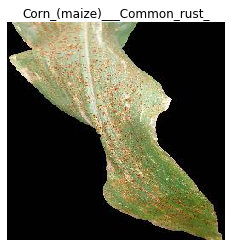

In [0]:
image_path = "./CropTestImages/test/CornCommonRust3.JPG"
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Prediction:")
prediction = model.predict(img)

fla = prediction.flatten()
ma = fla.max()
for index,item in enumerate(fla):
    if item == ma:
        class_name = classes[index]    
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()